# 🌟 Assignment 2. Operation "AI GeoGuessr"

### Deadline: Friday, October 24, 2025, 11:59:00 PM CET (GMT +2)

## 🎯 Mission Overview

The operation consists of two independent missions. Similar to the previous operation, students are required to solve the tasks by achieving the required score and answering the follow-up questions.

## 🧪 Neural Networks and Unsupervised Learning

1. **Mission 2.1 (Supervised Learning)**: 
   - Solve a supervised learning problem using a multilayer perceptron (MLP).

2. **Mission 2.2 (Unsupervised Learning)**:
   - Given an unlabeled dataset, your task is to cluster similar data points and achieve 100% clustering accuracy. You will not have access to the true labels, but you can verify your cluster assignments using the Kaggle competition provided.

## 📝 Delivery Format (Blackboard)

Please submit **two files**:
1. The completed Jupyter notebook.
2. The solution for the second dataset as a CSV file with two `int` columns: `['ID', 'cluster']`.

## Kaggle details
- Invitation link: https://www.kaggle.com/t/dfb72837bdb346449768b8f6ce50b6dc
- Kaggle is a popular platform for data science competitions.
- It allows us to create a Private competition where you can submit your solutions and verify whether you are thinking in the right direction.
- The results of the competition is visible only to the competition participants. 
- We will not grade the submissions on Kaggle, we set it up to let you check your clustering.
- You still have to deliver the `.csv` file of the solution and the complete `.ipynb` notebook with discussions and solution code.  

> Good luck, comrade!

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import random
import os
import math

/Users/jonasjacobsen/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Tps:

LR-schedueling
Ulike metoder for 

# 🧠 Mission 2.1: Decoding SkyNet's Neural Encryption **(using Neural Networks)**

### 🌐 The Discovery
The dataset consists of the same "Synapse Cipher" data from Assignment 1.

### 🎯 Your Mission
1. Implement a multilayer perceptron (MLP) using one of the following frameworks: Keras, PyTorch, or TensorFlow.
2. Solve the non-linear problem without manual feature engineering.
3. Predict SkyNet's binary decisions (0 or 1) based on paired signals.
4. Improve performance by using techniques such as learning rate scheduling, selecting a good optimizer, and fine-tuning hyperparameters.

> Note: There are no restrictions on the tricks you can use — Have fun :) 

### 📊 Formal Requirements
1. **Implementation**:
   - Develop a Neural Network using predefined functions/layers.
   - Use one of the popular frameworks: Keras, PyTorch, or TensorFlow.
   - Implement a manual learning rate scheduler with warmup and cosine decay.

2. **Performance**: Achieve at least **0.92** accuracy on the test set.

3. **Discussion**:
   - How can you make sure the results are reproduable?
   - Visualize the network's architecture and decision boundary.
   - Which optimizer did you choose? Discuss the differences between SGD and Adam.
   - Plot the learning rate curve. Did the learning rate scheduling improve performance? Why or why not?
   - Conduct a simple ablation study of each architectural and optimization choice concerning test accuracy.

In [2]:
data = pd.read_csv('data/nn_data.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']


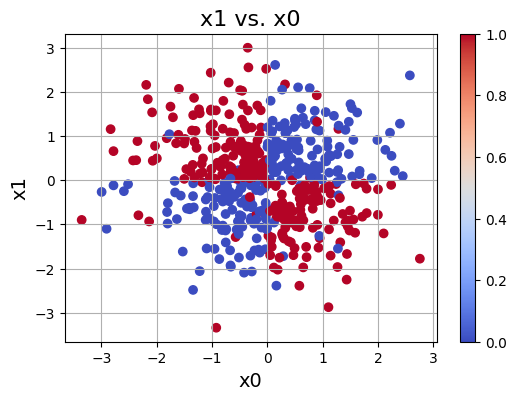

In [3]:
plt.figure(figsize=(6, 4))
plt.scatter(train['x0'], train['x1'], c=train['y'], cmap='coolwarm')
plt.grid(True)
plt.xlabel('x0', fontsize=14)
plt.ylabel('x1', fontsize=14)
plt.title('x1 vs. x0', fontsize=16)
plt.colorbar()
plt.show()

In [4]:
## Data analysis

X_train = train[["x0", "x1"]].values
y_train = train[["y"]].values

X_test = test[["x0", "x1"]].values
y_test = test[["y"]].values

print(X_train.shape, X_test.shape)

(500, 2) (500, 2)


Test accuracy: 0.9220


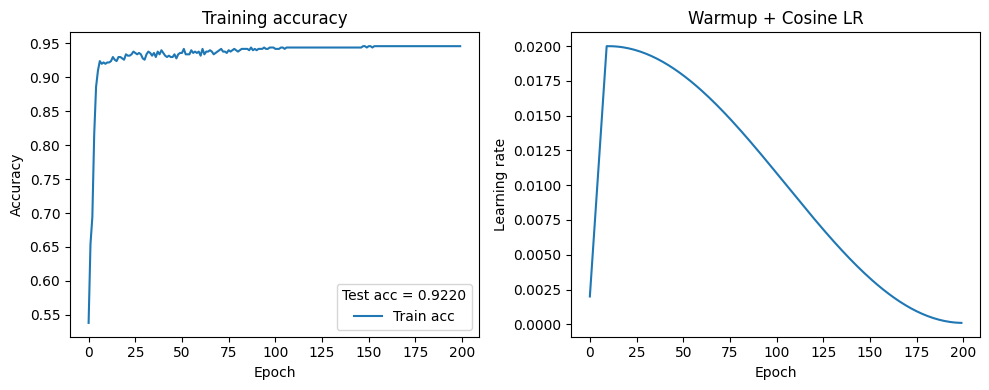

In [5]:
# setting seed for reproduceability
SEED = 42
os.environ["PYTHONHASHSEED"] = str(SEED)
np.random.seed(SEED); random.seed(SEED); tf.random.set_seed(SEED)

# hyper parameters
EPOCHS        = 200
BATCH_SIZE    = 32
BASE_LR       = 0.02 # maks LR after warmup 
MIN_LR        = 1e-4 # lowest LR after cosinus decay
WARMUP_EPOCHS = 10

# model setup
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=BASE_LR),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# learning-rate schedule (warmup + cosinus)
def lr_schedule(epoch):
    if epoch < WARMUP_EPOCHS:
        return BASE_LR * (epoch + 1) / WARMUP_EPOCHS # linear warmup
    progress = (epoch - WARMUP_EPOCHS) / (EPOCHS - WARMUP_EPOCHS)
    return MIN_LR + 0.5 * (BASE_LR - MIN_LR) * (1 + math.cos(math.pi * progress)) # cosinus decay

lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_schedule, verbose=0)

# trainng
history = model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=0,
    callbacks=[lr_callback]
)

# testing, output function
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

def output():
    lrs = [lr_schedule(e) for e in range(EPOCHS)]

    print(f"Test accuracy: {test_acc:.4f}")

    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    # (1) Accuracy
    ax[0].plot(history.history["accuracy"], label="Train acc")
    ax[0].set_title("Training accuracy")
    ax[0].set_xlabel("Epoch"); ax[0].set_ylabel("Accuracy")
    ax[0].legend(loc="lower right", title=f"Test acc = {test_acc:.4f}")

    # (2) Learning rate
    ax[1].plot(lrs)
    ax[1].set_title("Warmup + Cosine LR")
    ax[1].set_xlabel("Epoch"); ax[1].set_ylabel("Learning rate")

    plt.tight_layout()
    plt.show()

output()

## Work history

### First implementation: Model archicture

Model setup with two hidden layers with 8 nodes each, one sigmoid output node. Using ReLu activating funksjon for the hidden layers. Trained over 300 epochs with a standard learning rate at 0.01 for SGD optimizer.


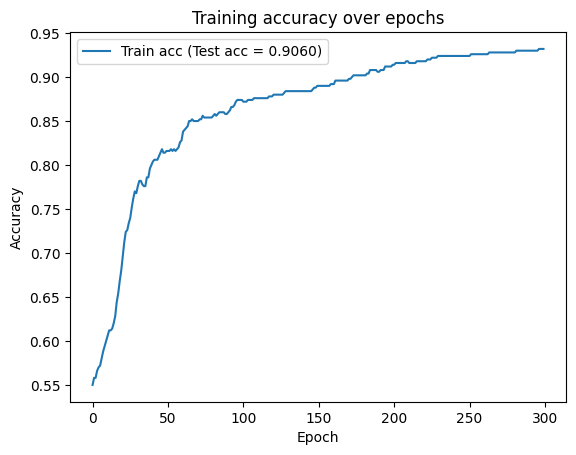


### Second implementation: Adding LR schedueling


Added learingn schedulurer with warmp and cosine decay, dit not work that well with SGD.


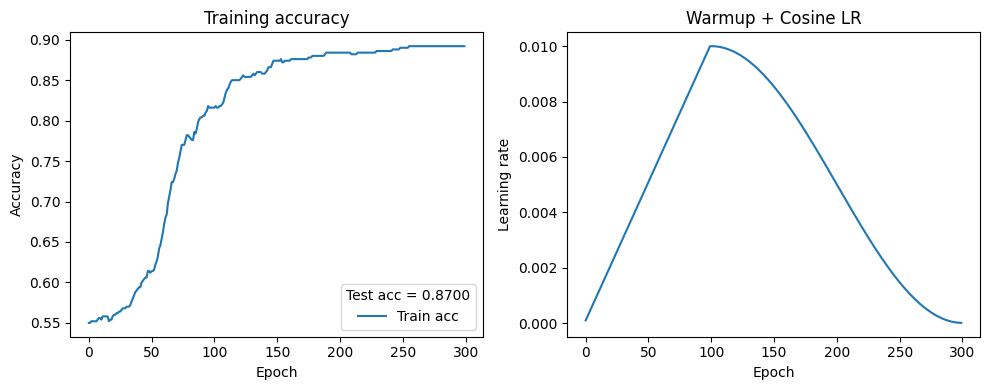


### Third implementation: Moving to Adam from SGD optimizer

Changed the optimizer to adam which is more stabile. This resulted in higher accuracy and faster convergence during training.

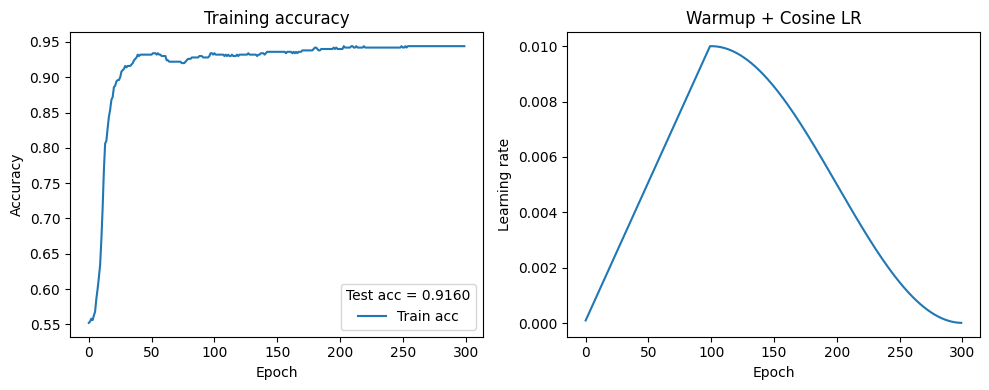


### Fourth implemtation: Ajusting hyperparamters (max and min learning rate)

After some tweaking on the max and min i got an accuraxy at 0.9220

hyper parameters used:
```python
EPOCHS        = 200
BATCH_SIZE    = 32
BASE_LR       = 0.02 # maks LR after warmup 
MIN_LR        = 1e-4 # lowest LR after cosinus decay
WARMUP_EPOCHS = 10
```

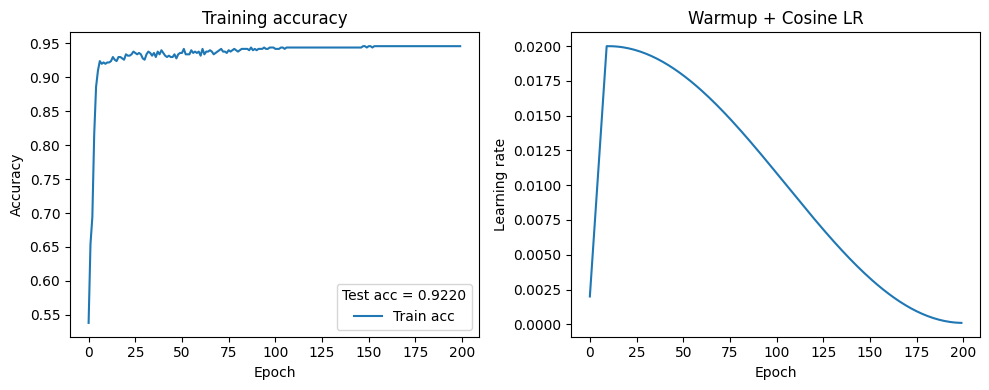

In [6]:
# ASCII diagram like: Input(2) → Dense(16, relu) → Dense(8, relu) → Dense(1, sigmoid)
parts = [f"Input({model.input_shape[-1]})"]
for L in model.layers:
    if isinstance(L, tf.keras.layers.Dense):
        act = getattr(L.activation, "__name__", str(L.activation))
        parts.append(f"Dense({L.units}, {act})")
    else:
        parts.append(L.__class__.__name__)
print("  " + " → ".join(parts))

  Input(2) → Dense(16, relu) → Dense(8, relu) → Dense(1, sigmoid)


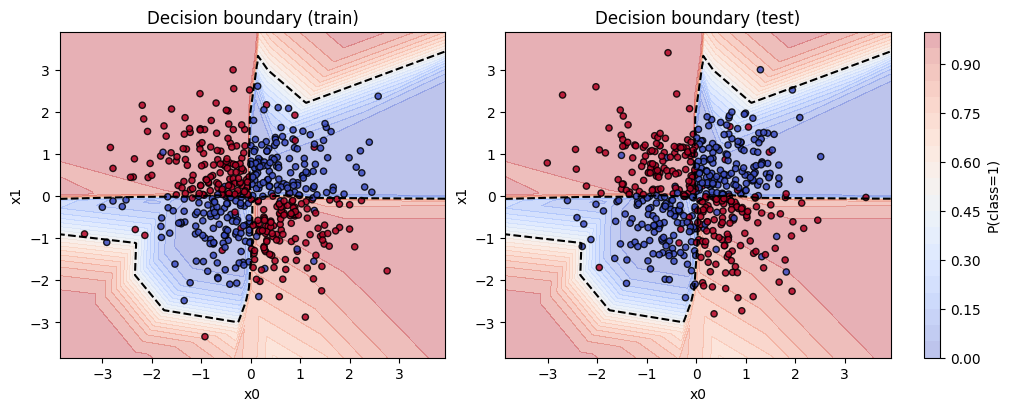

In [7]:
def plot_decision_boundaries_subplots(model, X_train, y_train, X_test, y_test):
    # grid limits from both splits
    X_all = np.vstack([X_train, X_test])
    x_min, x_max = X_all[:, 0].min() - 0.5, X_all[:, 0].max() + 0.5
    y_min, y_max = X_all[:, 1].min() - 0.5, X_all[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                         np.linspace(y_min, y_max, 400))
    grid = np.c_[xx.ravel(), yy.ravel()].astype(np.float32)

    

    # shared probability field over the grid
    probs = model.predict(grid, verbose=0).reshape(xx.shape)

    # subplots with constrained layout (no overlap)
    fig, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

    for ax, (X, y, title) in zip(
        axes,
        [(X_train, y_train, "Decision boundary (train)"),
         (X_test,  y_test,  "Decision boundary (test)")]
    ):
        cs = ax.contourf(xx, yy, probs, levels=20, alpha=0.35, cmap="coolwarm")
        ax.contour(xx, yy, probs, levels=[0.5], colors="k", linewidths=1.5, linestyles="--")
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", s=20, edgecolors="k", alpha=0.85)
        ax.set_xlabel("x0"); ax.set_ylabel("x1"); ax.set_title(title)

    # one colorbar for both axes, placed outside on the right
    fig.colorbar(cs, ax=axes.ravel().tolist(), label="P(class=1)",
                 fraction=0.046, pad=0.04)

    plt.show()

plot_decision_boundaries_subplots(model, X_train, y_train, X_test, y_test)

## Discussion:
   - **How can you make sure the results are reproduable?**


      Setting a seed. Se example:

      ```python
      # setting seed for reproduceability
      SEED = 42
      os.environ["PYTHONHASHSEED"] = str(SEED)
      np.random.seed(SEED); random.seed(SEED); tf.random.set_seed(SEED)
      ```

   - **Visualize the network's architecture and decision boundary.**

      Architecture:
   
      ```python
           Input(2) → Dense(16, relu) → Dense(8, relu) → Dense(1, sigmoid)
      ```
   
      Decision boundary:

      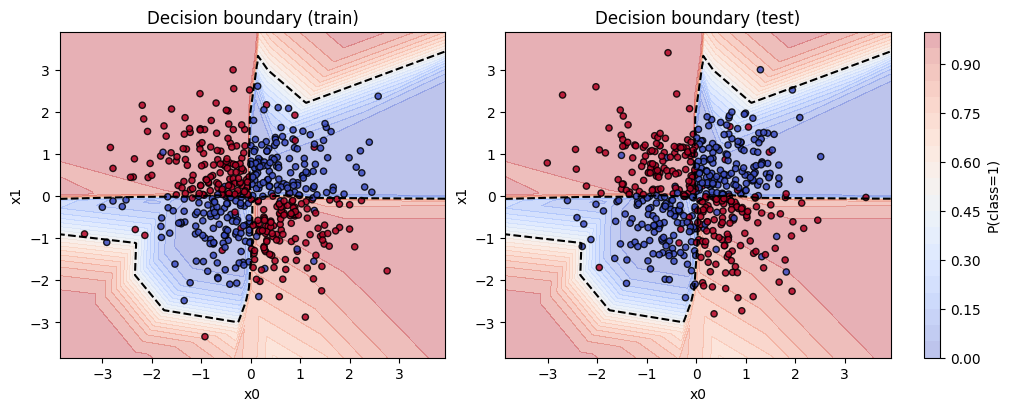

   
   - **Which optimizer did you choose? Discuss the differences between SGD and Adam.**

      I did try both, but ended up with Adam becuase it gave better accuracy and fastter convergence during training. The biggest difference betweeen them is that the learning rate is fixed for SGD and not fixed for Adamn where it adapts per paramterer by itself. Adman does also include momentum, where its optional for SGD. For unseen data, SGD could be better becuase Adam may overfit.


   - **Plot the learning rate curve. Did the learning rate scheduling improve performance? Why or why not?**

      I've plotted the learning rate curve in Work history, I first implemented a solution without LR-schedueling, where the accuracy was at 0.9, when first addding LR-schedueling the acccuracu droppen to 0.87, which is much worse. It did not work well becuase of poor hyper parameter tuning. 


   - **Conduct a simple ablation study of each architectural and optimization choice concerning test accuracy.**



      Adding two hidden layers in the architerchture helped alot, using Adman insted of SGD optimizer did also help. Using LR-schedueling did not help that much.



# 📶📡🛰️🤳 Mission 2.2: Locate the AI Servers

### 🌐 The Discovery
The NTNU Intelligence team has intercepted encrypted documentation that potentially reveals the locations of AI-compromised servers within Trondheim. Our analysts believe the data contains information about these servers' locations. 

However, the number of servers and their exact positions remain unknown. To execute a strategic response, we need to understand the intercepted data and pinpoint the main AI servers.

We have also discovered a vulnerability in the AI's security: it has deployed a clustering verification feature on Kaggle. We can exploit this backdoor to validate our clustering hypotheses.

### 🎯 Your Mission
Identify the number of hidden servers (clusters) in the dataset. Assign cluster labels to each row in the original dataset and validate your clustering solution on Kaggle.  When achieved the perfect clustering accuracy, find the precise locations of these servers (clusters).

### 🧠 The Challenge
1. **Large Dataset**: The intercepted data file contains numerous features, making direct manipulation and clustering difficult. Applying dimensionality reduction techniques could help reveal patterns.
2. **Unsupervised Learning**: No target labels are provided, so you must identify patterns based solely on the dataset's features.
3. **Data Obfuscation**: The AI has obfuscated the data, making it difficult to discern its true structure. You must effectively manipulate the data to visually identify server locations.


### 🚀 Your Tools
- The intercepted AI dataset.
- Skills in feature engineering, data manipulation, and visualization.
- Clustering algorithms (e.g., KMeans, DBSCAN, Birch, Agglomerative Clustering, etc.) — [Clustering in Scikit-Learn](https://scikit-learn.org/stable/modules/clustering.html)
- Dimensionality reduction techniques (e.g., PCA, t-SNE, Isomap, UMAP, etc.)
- Kaggle competition platform with a daily submission limit of 50 attempts.

> Note: Kaggle competition link — [Kaggle Competition](https://www.kaggle.com/t/dfb72837bdb346449768b8f6ce50b6dc)

### 📊 Formal Requirements
1. **Achieve 100% Clustering Accuracy** on Kaggle.
> Note: The only way to check whether your clustering is correct is to submit it to Kaggle. We do not give you the clusters directly.

2. **Discussion Questions**:
   - **Dimensionality Reduction**: Which dimensionality reduction methods helped you determine the correct number of clusters? Why did some methods work better than others? Explain the differences between PCA, t-SNE, and UMAP.

      UMAP helped the most determining the number of clusters. I will argue that UMAP works better because of it's non-linearity compared to PCA, and its better at perserving global relationships compared to t-SNE.

      The difference between PCA, t-SNE and UMAP lays in how the algorithms work. PCA takes the projection of one dimension on to the other and mergers them togehter through measuring varience of the column. This works great on linear distrubuted data, but will be weaker when non-linearity is introduced. t-SNE on the other hand minimizes the divergence between the pairwise probality at high-dimension and the heavy tail (student-t) probailty in low-dimension with Kullback-Leibler, before it optimizes with gradient descent as the last step. t-SNE works for non-linear distrubutions of data, distant points are also not that meaningful. UMAP builds two fuzzy graphs, one for high and one for low dimensions, it will then optimize the embedding by minimizing the cross entropy between the two fuzzy graphs. In addition to t-SNE, UMAP is non-linear, its better at preserving global relationships.

   - **Clustering Approach**: Which clustering algorithm and hyperparameters did you use? Discuss the differences between algorithms like KMeans and DBSCAN.

      I did try both, but got better results with DBSCAN.

      The input paramters for  Kmeans is k for the number of clusters, it will then randombly place k points in the space, then the datapoints will attach to their nearest centroid. 

   - **Data Type Analysis**: What is the hidden data type in the dataset? How does this information influence feature extraction for clustering? Can it explain why some dimensionality reduction algorithms are more effective?
   - **Server Locations**: Identify the server locations. List the specific facilities in Trondheim and explain how you deduced their locations.
   - **Advanced Task (Optional)**: Extract features using modern pre-trained neural networks for this data type. Apply dimensionality reduction and clustering algorithms to the extracted features.

In [8]:
## imports and random seed
import sklearn
import umap.umap_ as umap

RANDOM_STATE = 42  # Global random seed for reproducibility
random.seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)


/Users/jonasjacobsen/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
# Hmmmmm, why is the first row skipped?
data = pd.read_csv('data/unsupervised_data.csv', skiprows=1, header=None)
# Get the ID column
data.reset_index(drop=False, inplace=True)
data.rename(columns={'index': 'ID'}, inplace=True)
print(data.shape)


(4000, 16385)


In [10]:
## scale/normalize the data
X = data.values
scaler = sklearn.preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)


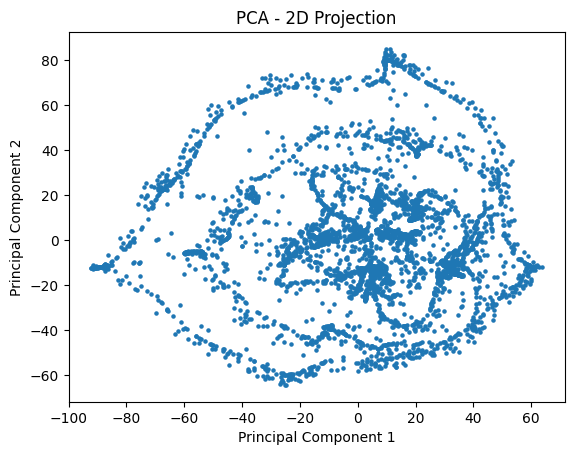

In [11]:
## PCA 2D
pca = sklearn.decomposition.PCA(n_components=2, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], s=5)
plt.title("PCA - 2D Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


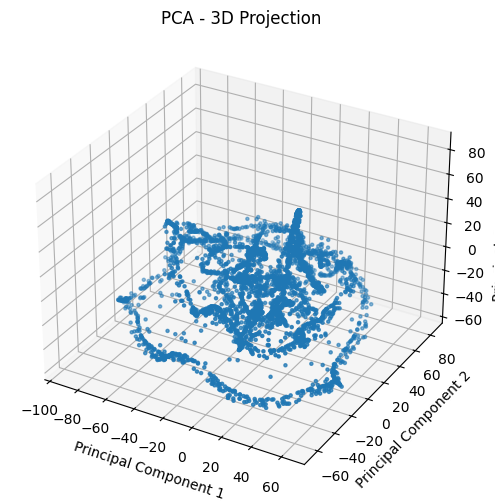

In [12]:
# PCA 3D
pca = sklearn.decomposition.PCA(n_components=3, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_scaled)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], s=5)
ax.set_title("PCA - 3D Projection")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.show()

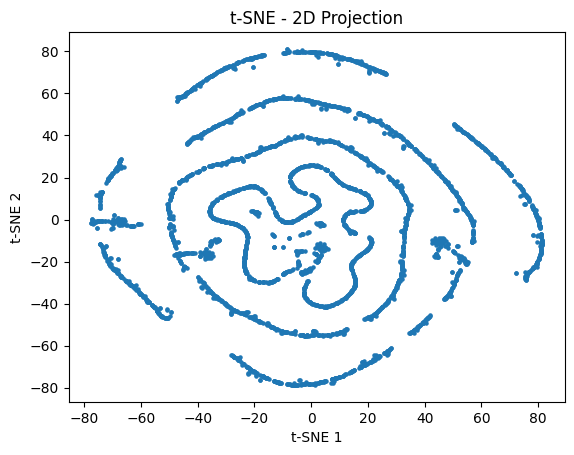

In [13]:
## t-SNE 2D
tsne = sklearn.manifold.TSNE(n_components=2, perplexity=25, learning_rate='auto', init='pca', random_state=RANDOM_STATE)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=5)
plt.title("t-SNE - 2D Projection")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

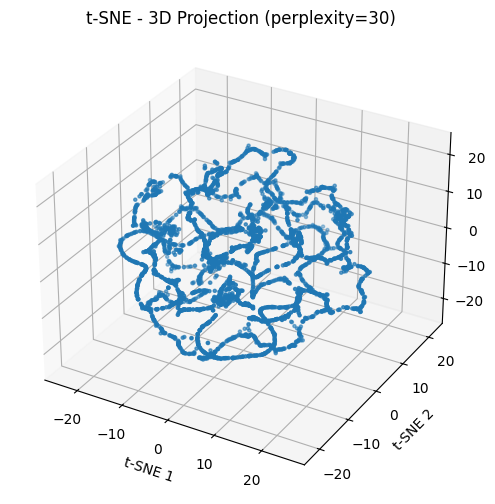

In [14]:
# 3D

perplexity = 30
tsne = sklearn.manifold.TSNE(n_components=3, perplexity=perplexity, random_state=RANDOM_STATE)
X_tsne = tsne.fit_transform(X_scaled)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], s=5)
ax.set_title(f"t-SNE - 3D Projection (perplexity={perplexity})")
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.set_zlabel("t-SNE 3")
plt.show()

/Users/jonasjacobsen/Library/Python/3.9/lib/python/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


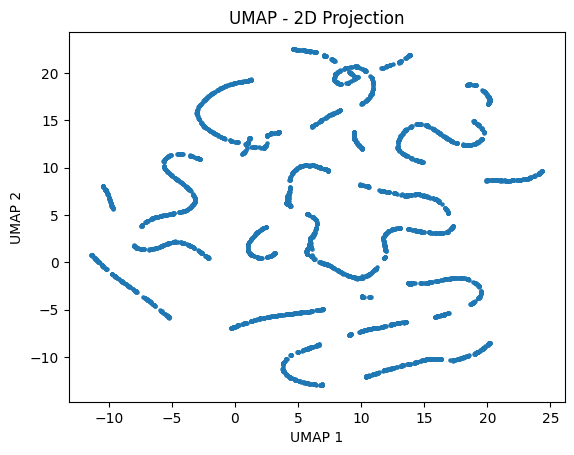

In [15]:
## UMAP in 2D
#umap_2d = umap.UMAP(n_components=2, random_state=RANDOM_STATE)
umap_2d = umap.UMAP(n_components=2, n_neighbors=10, min_dist=0.1, random_state=1)
X_umap = umap_2d.fit_transform(X_scaled)

plt.scatter(X_umap[:, 0], X_umap[:, 1], s=5)
plt.title("UMAP - 2D Projection")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()

/Users/jonasjacobsen/Library/Python/3.9/lib/python/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


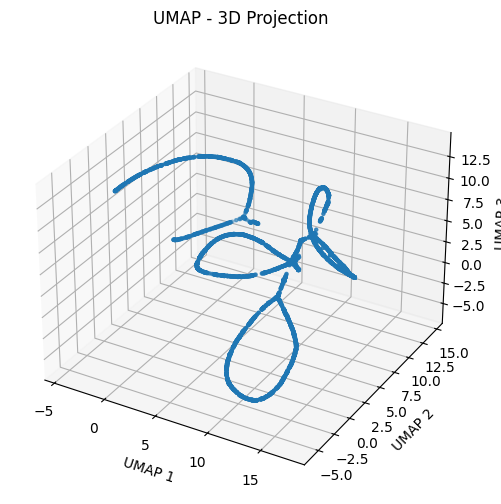

In [28]:
## UMAP in 3d
umap_3d = umap.UMAP(n_components=3, 
                    n_neighbors=30,
                    local_connectivity=0.1,
                    random_state=RANDOM_STATE, )
X_umap3d = umap_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_umap3d[:, 0], X_umap3d[:, 1], X_umap3d[:, 2], s=5)
ax.set_title("UMAP - 3D Projection")
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.set_zlabel("UMAP 3")
plt.show()


In [29]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np, pandas as pd

X_umap = X_umap3d

eps_grid = np.linspace(0.1, 8, 31)
min_samples_grid = [5, 8, 10, 12, 15, 20]

rows = []
for eps in eps_grid:
    for ms in min_samples_grid:
        lab = DBSCAN(eps=eps, min_samples=ms).fit_predict(X_umap)
        k = len(set(lab)) - (1 if -1 in lab else 0)
        if k != 4: 
            rows.append((eps, ms, k, np.nan, np.mean(lab==-1), np.nan))
            continue
        mask = lab != -1
        sil = silhouette_score(X_umap[mask], lab[mask]) if mask.any() and len(set(lab[mask]))>1 else -np.inf
        sizes = [np.sum(lab==c) for c in set(lab) if c!=-1]
        balance = np.std(sizes) / (np.mean(sizes)+1e-9)
        rows.append((eps, ms, k, sil, np.mean(lab==-1), balance))

res = pd.DataFrame(rows, columns=["eps","min_samples","k","silhouette","noise","balance"])
res4 = res[res.k==4].sort_values(["silhouette","noise","balance"], ascending=[False,True,True])
print(res4.head(10))

best_eps, best_ms = res4.iloc[0][["eps","min_samples"]]
labels = DBSCAN(eps=best_eps, min_samples=int(best_ms)).fit_predict(X_umap)
print("best_eps:", best_eps, "best_min_samples:", int(best_ms))

         eps  min_samples  k  silhouette  noise   balance
12  0.626667            5  4    0.398264    0.0  0.014142
13  0.626667            8  4    0.398264    0.0  0.014142
14  0.626667           10  4    0.398264    0.0  0.014142
15  0.626667           12  4    0.398264    0.0  0.014142
16  0.626667           15  4    0.398264    0.0  0.014142
18  0.890000            5  4    0.398264    0.0  0.014142
19  0.890000            8  4    0.398264    0.0  0.014142
20  0.890000           10  4    0.398264    0.0  0.014142
21  0.890000           12  4    0.398264    0.0  0.014142
22  0.890000           15  4    0.398264    0.0  0.014142
best_eps: 0.6266666666666667 best_min_samples: 5


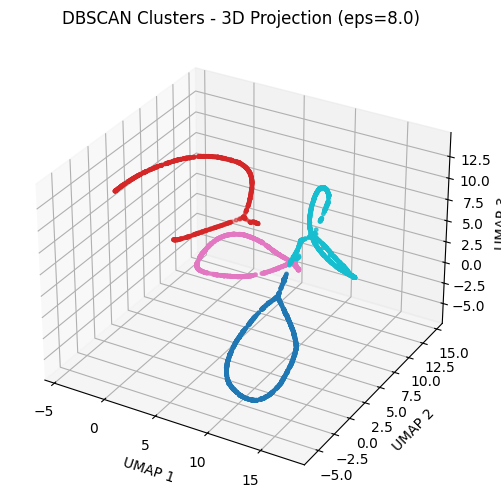

In [30]:
## DBSCAN 3D
X_umap = X_umap3d
dbscan = sklearn.cluster.DBSCAN(eps=0.63, min_samples=5)
labels = dbscan.fit_predict(X_umap)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_umap[:, 0], X_umap[:, 1], X_umap[:, 2], c=labels, s=6, cmap='tab10')
ax.set_title(f"DBSCAN Clusters - 3D Projection (eps={eps})")
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.set_zlabel("UMAP 3")
plt.show()

In [31]:
## submission generation

submission = pd.DataFrame({
    "ID": np.arange(len(labels)),
    "cluster": labels.astype(int)
})

submission.to_csv("submission.csv", index=False)
print(submission.head())
print(f"Saved submission.csv with {submission['cluster'].nunique()} unique clusters.")

   ID  cluster
0   0        0
1   1        1
2   2        0
3   3        1
4   4        2
Saved submission.csv with 4 unique clusters.


---

## work history

For cheking how many components i did this code to check the vvariance:

pca = sklearn.decomposition.PCA().fit(X_scaled)
print(np.cumsum(pca.explained_variance_ratio_)[100:500:50])

In [ ]:
# To check your clustering, you need to assign the predicted cluster ids and submit it as a CSV file. The submission should be a CSV file with two columns: ID and cluster. 
# The ID column should contain the ID of the data point, and the cluster column should contain the cluster ID that the data point belongs to. 
# The cluster ID should be an integer. Current cluster IDs in sample_submission.csv are randomly generated.
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission

FileNotFoundError: [Errno 2] No such file or directory: 'sample_submission.csv'

---


---

## 🎯 Note: Clustering Accuracy Evaluation

The clustering accuracy metric evaluates how well the predicted clusters match the true clusters, irrespective of the specific labels or names assigned to the clusters.

This means that the evaluation is solely based on the correct grouping of data points rather than the numerical labels of the clusters themselves.

## Key Characteristics

- **Name-Independent**: The metric cares only about how well the data points are grouped together, not the specific numerical or categorical labels used for the clusters.
- **Focus on Grouping**: The evaluation rewards cluster assignments that correctly group the same data points together, regardless of the specific labels assigned.

### Example

If the true cluster assignments are:

```
[0, 0, 0, 1, 1, 1]
```

and your predicted cluster assignments are:

```
[1, 1, 1, 0, 0, 0]
```

the accuracy will still be **1.0** because the grouping of points is identical, even though the numerical labels are swapped.

## How the Metric is Computed

1. **Contingency Matrix**: 
   - Construct a contingency matrix that represents the overlap between the true clusters and the predicted clusters.

2. **Optimal Correspondence**: 
   - Use an optimization algorithm, such as the Hungarian method (linear sum assignment), to find the best possible correspondence between true and predicted labels, maximizing the number of correctly assigned data points.

3. **Accuracy Calculation**: 
   - Calculate the accuracy as the ratio of correctly matched data points to the total number of data points.

> This approach ensures that the evaluation is based on **cluster completeness** and **homogeneity**, rewarding cluster assignments that correctly group the same data points together, regardless of the specific labels used.

---

In [ ]:
import numpy as np
import scipy.optimize
import sklearn.metrics

def calculate_clustering_accuracy(true_labels: np.ndarray, cluster_labels: np.ndarray) -> float:
    """
    Calculate the clustering accuracy between true labels and cluster labels.

    The function constructs a contingency matrix between the true labels and cluster labels.
    It then uses the Hungarian algorithm (also known as linear sum assignment) to find the
    best matching between the cluster labels and true labels. The clustering accuracy is 
    calculated as the number of correctly matched labels divided by the total number of labels.

    Args:
        true_labels (np.ndarray): An array of true labels for each data point.
        cluster_labels (np.ndarray): An array of cluster labels predicted by a clustering algorithm.

    Returns:
        float: The clustering accuracy, a value between 0 and 1 representing the proportion of 
               correctly matched labels.
    
    Example:
        >>> true_labels = np.array([0, 1, 2, 0, 1, 2])
        >>> cluster_labels = np.array([1, 2, 0, 1, 2, 0])
        >>> calculate_clustering_accuracy(true_labels, cluster_labels)
        1.0

    Raises:
        ValueError: If true_labels and cluster_labels are not of the same length.
    """
    # Check if the input labels are of the same length
    if true_labels.size != cluster_labels.size:
        raise ValueError("true_labels and cluster_labels must have the same length.")

    # Construct a contingency matrix where each cell [i, j] indicates the number of points with 
    # true label i and cluster label j.
    contingency_matrix = sklearn.metrics.cluster.contingency_matrix(true_labels, cluster_labels)
    
    # Find the best matching between true labels and cluster labels using the Hungarian algorithm.
    # We negate the contingency matrix because linear_sum_assignment finds the minimum cost assignment.
    row_ind, col_ind = scipy.optimize.linear_sum_assignment(-contingency_matrix)
    
    # Calculate the number of correctly assigned labels according to the optimal matching.
    correct_pairs = contingency_matrix[row_ind, col_ind].sum()
    
    # Compute the clustering accuracy as the ratio of correctly matched labels to total labels.
    accuracy = correct_pairs / true_labels.size

    return accuracy

In [ ]:
true_labels = np.array([0, 1, 2, 0, 1, 2])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

1.0

In [ ]:
true_labels = np.array([0, 0, 0, 0, 0, 0])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

0.3333333333333333

In [ ]:
true_labels = np.array([1, 1, 1, 2, 2, 2])
cluster_labels = np.array([0, 0, 0, 0, 0, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

0.5